<a href="https://colab.research.google.com/github/jorgelizarazo94/Suplementario_School/blob/main/Supplementary_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory analysis of a project analyzing the response of high school students to questions before and after a special activity.

[Jorge Lizarazo](https://www.researchgate.net/profile/Jorge-Lizarazo-Borrero)

5/8/2023

This project is part of Juan Perez's undergraduate thesis, supervised by Professor [PhD Maria Isabel Rivas](https://www.icesi.edu.co/profesores/cv/maria-rivas) . The aim of the project is to analyze the responses of high school students to questions before and after a special activity. The data was collected from thwo different schools, and includes the total number of letters and words in each response, as well as the difficulty level of the questions.

The initial analysis shows that the average number of letters and words in the responses increased after the activity, indicating an improvement in the students' ability to articulate their thoughts. Additionally, the difficulty level of the questions did not significantly impact the length of the responses.

Further analysis will be conducted to explore the differences between the schools and to determine if any other factors influenced the students' responses.


In [21]:

import pandas as pd  ####  
import numpy as np #### 
import xarray as xr  #### 
import matplotlib.pyplot as plt
import seaborn as sn

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
df = pd.read_csv('/content/drive/MyDrive/intento/PDG_Juan_final.csv', sep=',')
df.head(3)


,Colegio-Estudiante,School,APre1_2,%_veracidad_1,APre3,%_veracidad_3,APre4,%_veracidad_4,BPre1_2,%_veracidad_1_b,BPre3,%_veracidad_3_b,BPre4,%_veracidad_3_b.1
0,ColPi1,Pil,diferentes formas de nacer \n\nhuevos externa ...,0.75,0,0.0,0,0.00%,dentro de la mamá oviparos,0.5,esconden los huevos para protegerlos cocodrilos,1.0,avestruz tiburón cebra tiburón blanco,0.0
1,CoPi2,Pil,se reproducen en huevo afuera \n \n\npueden sa...,0.75,algunos peces esconden sus huevos para protege...,1.0,tiburón cebra y tiburón blanco,0.00%,dentro de la mamá o en huevos,1.0,para proteger sus huevos del peligro,1.0,los huevos del pez los dejan en el agua y los ...,0.5
2,ColPi3,Pil,reproducción huevo afuera \n \n\ndentro de la ...,0.75,esconde los huevos para protegerlos cocodrilos...,1.0,Avestruz tiburón cebra tiburón blanco,0.00%,"huevos externa, reproducción interna",1.0,para que no se lo coman los depredadores,1.0,los huevos de las gallinas son de color blanco...,1.0


In [23]:
dfR = df.drop(['%_veracidad_1','%_veracidad_3', '%_veracidad_4', '%_veracidad_1_b',
                  '%_veracidad_3_b', '%_veracidad_3_b.1'], axis=1)



In [24]:
dfP = df.drop(['APre1_2','APre3', 'APre4', 'BPre1_2',
                  'BPre3', 'BPre4'], axis=1)

In [25]:
dfR.head(3)

,Colegio-Estudiante,School,APre1_2,APre3,APre4,BPre1_2,BPre3,BPre4
0,ColPi1,Pil,diferentes formas de nacer \n\nhuevos externa ...,0,0,dentro de la mamá oviparos,esconden los huevos para protegerlos cocodrilos,avestruz tiburón cebra tiburón blanco
1,CoPi2,Pil,se reproducen en huevo afuera \n \n\npueden sa...,algunos peces esconden sus huevos para protege...,tiburón cebra y tiburón blanco,dentro de la mamá o en huevos,para proteger sus huevos del peligro,los huevos del pez los dejan en el agua y los ...
2,ColPi3,Pil,reproducción huevo afuera \n \n\ndentro de la ...,esconde los huevos para protegerlos cocodrilos...,Avestruz tiburón cebra tiburón blanco,"huevos externa, reproducción interna",para que no se lo coman los depredadores,los huevos de las gallinas son de color blanco...


In [26]:
dfR.columns

Index(['Colegio-Estudiante', 'School', 'APre1_2', 'APre3', 'APre4', 'BPre1_2',
       'BPre3', 'BPre4'],
      dtype='object')

In [27]:
# Definir función para contar el número de letras y palabras en una lista de strings
def count_letters_words(text_list):
    total_letters = sum(len(x) for x in text_list)
    total_words = sum(len(x.split()) for x in text_list)
    return total_letters, total_words

# Aplicar la función a las columnas de interés y crear nuevas columnas con los resultados
dfR[['APre1_2_letters', 'APre1_2_words']] = dfR['APre1_2'].apply(count_letters_words).apply(pd.Series)
dfR[['APre3_letters', 'APre3_words']] = dfR['APre3'].apply(count_letters_words).apply(pd.Series)
dfR[['APre4_letters', 'APre4_words']] = dfR['APre4'].apply(count_letters_words).apply(pd.Series)
dfR[['BPre1_2_letters', 'BPre1_2_words']] = dfR['BPre1_2'].apply(count_letters_words).apply(pd.Series)
dfR[['BPre3_letters', 'BPre3_words']] = dfR['BPre3'].apply(count_letters_words).apply(pd.Series)
dfR[['BPre4_letters', 'BPre4_words']] = dfR['BPre4'].apply(count_letters_words).apply(pd.Series)

In [28]:
# Agrupar el dataframe por 'Colegio-Estudiante' y 'School' y sumar el número de letras y palabras en cada respuesta
df_agg = dfR.groupby(['Colegio-Estudiante', 'School']).sum().reset_index()

# Reemplazar los valores nulos con ceros
df_agg.fillna(value=0, inplace=True)

<ipython-input-28-631943f0d0cc>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agg = dfR.groupby(['Colegio-Estudiante', 'School']).sum().reset_index()


In [29]:
df_agg.head(3)

,Colegio-Estudiante,School,APre1_2_letters,APre1_2_words,APre3_letters,APre3_words,APre4_letters,APre4_words,BPre1_2_letters,BPre1_2_words,BPre3_letters,BPre3_words,BPre4_letters,BPre4_words
0,CoPi2,Pil,83,64,84,71,31,26,30,23,37,31,85,66
1,ColPi1,Pil,67,55,1,1,1,1,27,22,48,42,38,33
2,ColPi10,Pil,104,83,37,32,38,33,26,19,17,15,55,42


In [30]:
diver_cob = df_agg.groupby('School').count().reset_index()
diver_cob

,School,Colegio-Estudiante,APre1_2_letters,APre1_2_words,APre3_letters,APre3_words,APre4_letters,APre4_words,BPre1_2_letters,BPre1_2_words,BPre3_letters,BPre3_words,BPre4_letters,BPre4_words
0,Pil,12,12,12,12,12,12,12,12,12,12,12,12,12
1,Quial,15,15,15,15,15,15,15,15,15,15,15,15,15


In [31]:
# calcular el promedio y la desviación estándar de cada columna
means = df_agg.mean()
stds = df_agg.std()

# mostrar los resultados
for column, mean, std in zip(df_agg.columns, means, stds):
    print(f"{column}: promedio = {mean:.2f}, desviación estándar = {std:.2f}")

Colegio-Estudiante: promedio = 70.93, desviación estándar = 28.22
School: promedio = 56.81, desviación estándar = 22.35
APre1_2_letters: promedio = 33.59, desviación estándar = 24.68
APre1_2_words: promedio = 27.89, desviación estándar = 20.76
APre3_letters: promedio = 11.26, desviación estándar = 16.26
APre3_words: promedio = 9.70, desviación estándar = 13.84
APre4_letters: promedio = 41.48, desviación estándar = 23.05
APre4_words: promedio = 33.63, desviación estándar = 18.55
BPre1_2_letters: promedio = 43.67, desviación estándar = 26.10
BPre1_2_words: promedio = 35.63, desviación estándar = 21.34
BPre3_letters: promedio = 59.33, desviación estándar = 33.46
BPre3_words: promedio = 47.56, desviación estándar = 26.92


<ipython-input-31-ddafe56c8a6f>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means = df_agg.mean()
<ipython-input-31-ddafe56c8a6f>:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stds = df_agg.std()


In [32]:
#########################################


import nltk
nltk.download('cess_esp')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('wordnet')
nltk.download('words')
nltk.download('gutenberg')
nltk.download('webtext')

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Package webtext is already up-to-date!


True

In [33]:
from nltk.corpus import cess_esp
from nltk.probability import FreqDist

spanish_words = cess_esp.words()
spanish_freq = FreqDist(spanish_words)


In [34]:
def get_word_difficulty(words, freq_dist):
    """
    Calculates the average difficulty score for a list of words based on their relative frequency in a corpus.
    """
    scores = []
    for word in words:
        freq = freq_dist.get(word, 0)
        score = -1 * (freq / len(freq_dist))  # We use a negative score to reflect higher difficulty for less frequent words
        scores.append(score)
    if len(scores) == 0:
        return 0
    else:
        return sum(scores) / len(scores)

In [35]:
def calcular_dificultad_palabras(texto, modelo_lenguaje):
    palabras = nltk.word_tokenize(texto)
    dificultades = [1.0 / (modelo_lenguaje.vocab[palabra.lower()].count + 1) for palabra in palabras]
    return sum(dificultades) / len(dificultades)

In [36]:
!pip install pyphen

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
import pyphen

diccionario = pyphen.Pyphen(lang='es')

def dificultad_palabras(texto):
    # Separamos el texto en palabras
    palabras = texto.split()
    
    # Calculamos la dificultad de cada palabra
    dificultades = []
    for palabra in palabras:
        silabas = diccionario.inserted(palabra).split("-")
        dificultad = len(silabas)
        dificultades.append(dificultad)
    
    # Calculamos la dificultad promedio de las palabras del texto
    dificultad_promedio = sum(dificultades) / len(dificultades)
    
    return dificultad_promedio

In [38]:
texto = "Este es un ejemplo de texto para analizar la dificultad de las palabras"
dificultad_promedio = dificultad_palabras(texto)
print(dificultad_promedio)

1.8461538461538463


In [39]:
# Iteramos sobre cada columna de pregunta
for columna in ['APre1_2', 'APre3', 'APre4', 'BPre1_2', 'BPre3', 'BPre4']:
    # Creamos una nueva columna en el dataframe para guardar los resultados de la función
    dfR[f'dificultad_palabras_{columna}'] = dfR[columna].apply(dificultad_palabras)

# Ejemplo para calcular la dificultad promedio de cada pregunta por colegio
dificultad_promedio_por_colegio = dfR.groupby('School')[['dificultad_palabras_APre1_2', 'dificultad_palabras_APre3',
                                                         'dificultad_palabras_APre4', 'dificultad_palabras_BPre1_2',
                                                         'dificultad_palabras_BPre3', 'dificultad_palabras_BPre4']].mean()

In [40]:
dificultad_promedio_por_colegio

,dificultad_palabras_APre1_2,dificultad_palabras_APre3,dificultad_palabras_APre4,dificultad_palabras_BPre1_2,dificultad_palabras_BPre3,dificultad_palabras_BPre4
School,,,,,,
Pil,2.038330,1.996600,1.683333,2.017378,2.019048,1.477576
Quial,1.835321,1.442963,1.059048,1.720055,1.672747,1.529868


In [41]:
# Creamos un dataframe para guardar los resultados
df_dificultad = pd.DataFrame()
columnas_preguntas = ['APre1_2', 'APre3', 'APre4', 'BPre1_2', 'BPre3', 'BPre4']
# Iteramos sobre cada columna y aplicamos la función dificultad_palabras para cada valor
for col in columnas_preguntas:
    # Agregamos una nueva columna con la dificultad de palabras
    dfR['dificultad_palabras_' + col] = dfR[col].apply(dificultad_palabras)
    
    # Creamos un dataframe agrupado por colegio y estudiante para calcular el promedio
    df_dificultad_pregunta = dfR.groupby(['School', 'Colegio-Estudiante'])['dificultad_palabras_' + col].mean()
    
    # Agregamos los resultados al dataframe principal
    df_dificultad = pd.concat([df_dificultad, df_dificultad_pregunta], axis=1)

# Mostramos el resultado
df_dificultad.head()

dificultad_palabras_APre1_2  dificultad_palabras_APre3  \
Pil CoPi2                       1.714286                   2.230769   
    ColPi1                      2.625000                   1.000000   
    ColPi10                     2.000000                   2.400000   
    ColPi12                     2.090909                   1.000000   
    ColPi3                      2.125000                   2.777778   

             dificultad_palabras_APre4  dificultad_palabras_BPre1_2  \
Pil CoPi2                          2.2                     1.428571   
    ColPi1                         1.0                     1.800000   
    ColPi10                        2.4                     1.400000   
    ColPi12                        1.0                     2.500000   
    ColPi3                         2.4                     3.000000   

             dificultad_palabras_BPre3  dificultad_palabras_BPre4  
Pil CoPi2                     2.000000                   1.315789  
    ColPi1                    2.666667                   2.400000  
    ColPi10                   3.000000                   1.230769  
    ColPi12                   3.000000                   1.500000  
    ColPi3                    1.750000                   1.818182

In [42]:

df_dificultad = df_dificultad.rename(columns={0: 'Columna1', 1: 'Columna2'})
df_dificultad.columns

Index(['dificultad_palabras_APre1_2', 'dificultad_palabras_APre3',
       'dificultad_palabras_APre4', 'dificultad_palabras_BPre1_2',
       'dificultad_palabras_BPre3', 'dificultad_palabras_BPre4'],
      dtype='object')

In [43]:
df_dificultad

dificultad_palabras_APre1_2  dificultad_palabras_APre3  \
Pil   CoPi2                          1.714286                   2.230769   
      ColPi1                         2.625000                   1.000000   
      ColPi10                        2.000000                   2.400000   
      ColPi12                        2.090909                   1.000000   
      ColPi3                         2.125000                   2.777778   
      ColPi4                         1.766667                   1.636364   
      ColPi5                         1.923077                   2.428571   
      ColPi6                         1.846154                   2.285714   
      ColPi7                         2.666667                   1.000000   
      ColPi8                         2.000000                   2.400000   
      ColPi9                         1.764706                   2.400000   
      ColoPi11                       1.937500                   2.400000   
Quial ColQuial1                      1.500000                   1.333333   
      ColQuial10                     1.500000                   1.833333   
      ColQuial11                     1.611111                   2.166667   
      ColQuial12                     1.692308                   1.000000   
      ColQuial13                     1.888889                   1.333333   
      ColQuial14                     1.812500                   1.333333   
      ColQuial15                     1.750000                   1.666667   
      ColQuial2                      1.857143                   1.500000   
      ColQuial3                      1.666667                   1.000000   
      ColQuial4                      1.583333                   1.333333   
      ColQuial5                      2.142857                   1.333333   
      ColQuial6                      2.000000                   2.111111   
      ColQuial7                      2.800000                   1.000000   
      ColQuial8                      2.125000                   1.000000   
      ColQuial9                      1.600000                   1.700000   

                  dificultad_palabras_APre4  dificultad_palabras_BPre1_2  \
Pil   CoPi2                        2.200000                     1.428571   
      ColPi1                       1.000000                     1.800000   
      ColPi10                      2.400000                     1.400000   
      ColPi12                      1.000000                     2.500000   
      ColPi3                       2.400000                     3.000000   
      ColPi4                       1.000000                     1.562500   
      ColPi5                       2.400000                     3.500000   
      ColPi6                       2.400000                     1.555556   
      ColPi7                       1.000000                     1.428571   
      ColPi8                       1.000000                     3.000000   
      ColPi9                       1.000000                     1.700000   
      ColoPi11                     2.400000                     1.333333   
Quial ColQuial1                    1.000000                     1.800000   
      ColQuial10                   1.000000                     1.600000   
      ColQuial11                   1.000000                     1.692308   
      ColQuial12                   1.000000                     1.652174   
      ColQuial13                   1.000000                     1.600000   
      ColQuial14                   1.000000                     1.642857   
      ColQuial15                   1.000000                     1.555556   
      ColQuial2                    1.000000                     1.600000   
      ColQuial3                    1.285714                     1.750000   
      ColQuial4                    1.000000                     1.785714   
      ColQuial5                    1.000000                     2.166667   
      ColQuial6                    1.000000                     1

In [44]:
type(df_dificultad)

pandas.core.frame.DataFrame

In [45]:
df_regular = pd.DataFrame(df_dificultad)

In [46]:
df_regular = df_regular.rename(columns={0: "A", 1: "B"})

In [47]:
df_regular = df_regular.reset_index()

In [48]:
df_regular.head(2)

,level_0,level_1,dificultad_palabras_APre1_2,dificultad_palabras_APre3,dificultad_palabras_APre4,dificultad_palabras_BPre1_2,dificultad_palabras_BPre3,dificultad_palabras_BPre4
0,Pil,CoPi2,1.714286,2.230769,2.2,1.428571,2.000000,1.315789
1,Pil,ColPi1,2.625000,1.000000,1.0,1.800000,2.666667,2.400000


In [49]:
df_regular = df_regular.rename(columns={'level_0': 'School',
                                        'level_1': 'ID_STUDENT'})

In [50]:
df_regular.head(3)

,School,ID_STUDENT,dificultad_palabras_APre1_2,dificultad_palabras_APre3,dificultad_palabras_APre4,dificultad_palabras_BPre1_2,dificultad_palabras_BPre3,dificultad_palabras_BPre4
0,Pil,CoPi2,1.714286,2.230769,2.2,1.428571,2.000000,1.315789
1,Pil,ColPi1,2.625000,1.000000,1.0,1.800000,2.666667,2.400000
2,Pil,ColPi10,2.000000,2.400000,2.4,1.400000,3.000000,1.230769


In [51]:
df_regular.groupby('School').describe() 

dificultad_palabras_APre1_2                                          \
                             count      mean       std       min       25%   
School                                                                       
Pil                           12.0  2.038330  0.311340  1.714286  1.826282   
Quial                         15.0  1.835321  0.337034  1.500000  1.605556   

                                    dificultad_palabras_APre3            ...  \
            50%       75%       max                     count      mean  ...   
School                                                                   ...   
Pil     1.96875  2.099432  2.666667                      12.0  1.996600  ...   
Quial   1.75000  1.944444  2.800000                      15.0  1.442963  ...   

       dificultad_palabras_BPre3           dificultad_palabras_BPre4  \
                             75%       max                     count   
School                                                                 
Pil                     2.750000  3.000000                      12.0   
Quial                   1.792857  1.857143                      15.0   

                                                                         
            mean       std  min       25%       50%       75%       max  
School                                                                   
Pil     1.477576  0.346440  1.0  1.360197  1.387500  1.477941  2.400000  
Quial   1.529868  0.295536  1.0  1.437500  1.517241  1.609524  2.285714  

[2 rows x 48 columns]

In [52]:
df_melted = df_regular.melt(id_vars=['School', 'ID_STUDENT'], var_name='preguntas', value_name='dificultad')
df_melted.head()
nombres_niveles = df_melted['preguntas'].unique()
print(nombres_niveles)

['dificultad_palabras_APre1_2' 'dificultad_palabras_APre3'
 'dificultad_palabras_APre4' 'dificultad_palabras_BPre1_2'
 'dificultad_palabras_BPre3' 'dificultad_palabras_BPre4']


In [55]:
from scipy.stats import mannwhitneyu

# split data into two groups based on the 'Sp' column
######### Number of Leaves
p1_2A = df_melted[df_melted['preguntas'] == 'dificultad_palabras_APre1_2']['dificultad']
p1_2B = df_melted[df_melted['preguntas'] == 'dificultad_palabras_BPre1_2']['dificultad']

# perform Mann-Whitney U test
u_stat, p_val = mannwhitneyu(p1_2A, p1_2B, alternative='two-sided')
alpha = 0.05
if p_val < alpha:
    print(f'dificultad 1 y 2, The difference between the two groups is statistically significant (p={p_val:.3f}, alpha={alpha})')
else:
    print(f'dificultad 1 y 2, The difference between the two groups is not statistically significant (p={p_val:.3f}, alpha={alpha})')
#####

# split data into two groups based on the 'Sp' column
######### Number of Leaves
p3A = df_melted[df_melted['preguntas'] == 'dificultad_palabras_APre3']['dificultad']
p3B = df_melted[df_melted['preguntas'] == 'dificultad_palabras_BPre3']['dificultad']

# perform Mann-Whitney U test
u_stat, p_val = mannwhitneyu(p3A, p3B, alternative='two-sided')
alpha = 0.05
if p_val < alpha:
    print(f'dificultad 3, The difference between the two groups is statistically significant (p={p_val:.3f}, alpha={alpha})')
else:
    print(f'dificultad 3, The difference between the two groups is not statistically significant (p={p_val:.3f}, alpha={alpha})')
#####

# split data into two groups based on the 'Sp' column
######### Number of Leaves
p4A = df_melted[df_melted['preguntas'] == 'dificultad_palabras_APre4']['dificultad']
p4B = df_melted[df_melted['preguntas'] == 'dificultad_palabras_BPre4']['dificultad']

# perform Mann-Whitney U test
u_stat, p_val = mannwhitneyu(p4A, p4B, alternative='two-sided')
alpha = 0.05
if p_val < alpha:
    print(f'dificultad 4, The difference between the two groups is statistically significant (p={p_val:.3f}, alpha={alpha})')
else:
    print(f'dificultad 4, The difference between the two groups is not statistically significant (p={p_val:.3f}, alpha={alpha})')
#####

dificultad 1 y 2, The difference between the two groups is statistically significant (p=0.039, alpha=0.05)
dificultad 3, The difference between the two groups is not statistically significant (p=0.298, alpha=0.05)
dificultad 4, The difference between the two groups is statistically significant (p=0.004, alpha=0.05)


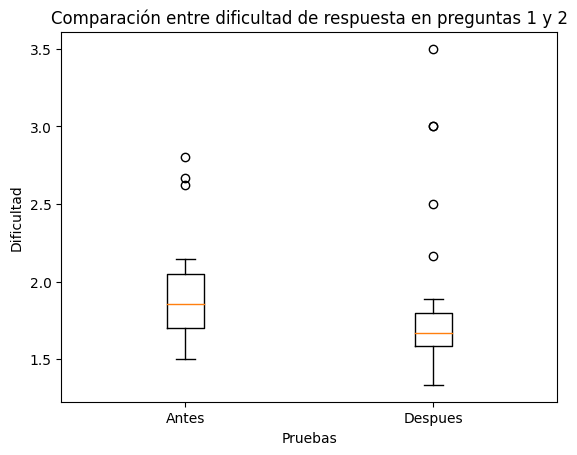

In [56]:
import matplotlib.pyplot as plt

# split data into two groups based on the 'Sp' column
p1_2A = df_melted[df_melted['preguntas'] == 'dificultad_palabras_APre1_2']['dificultad']
p1_2B = df_melted[df_melted['preguntas'] == 'dificultad_palabras_BPre1_2']['dificultad']

# create a boxplot
plt.boxplot([p1_2A, p1_2B], labels=['Antes', 'Despues'])

# add labels and title
plt.xlabel('Pruebas')
plt.ylabel('Dificultad')
plt.title('Comparación entre dificultad de respuesta en preguntas 1 y 2')

# display the plot
plt.show()

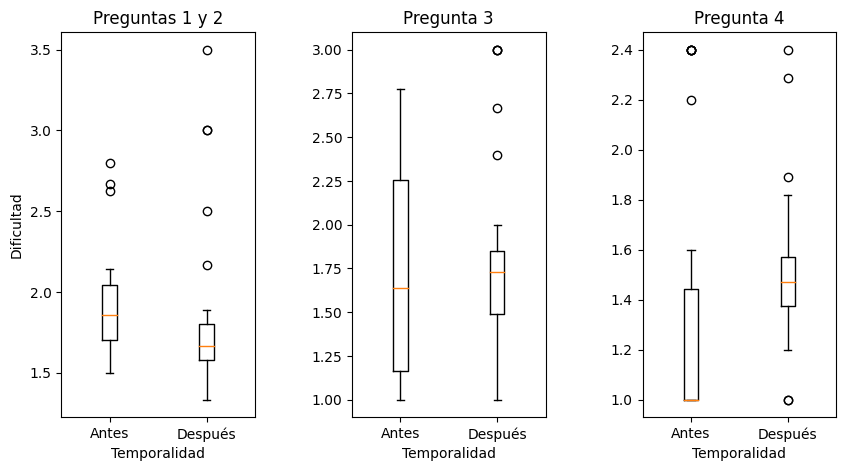

In [57]:
# split data into two groups based on the 'Sp' column
p1_2A = df_melted[df_melted['preguntas'] == 'dificultad_palabras_APre1_2']['dificultad']
p1_2B = df_melted[df_melted['preguntas'] == 'dificultad_palabras_BPre1_2']['dificultad']
p3A = df_melted[df_melted['preguntas'] == 'dificultad_palabras_APre3']['dificultad']
p3B = df_melted[df_melted['preguntas'] == 'dificultad_palabras_BPre3']['dificultad']
p4A = df_melted[df_melted['preguntas'] == 'dificultad_palabras_APre4']['dificultad']
p4B = df_melted[df_melted['preguntas'] == 'dificultad_palabras_BPre4']['dificultad']

# create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

# create the boxplots
axes[0].boxplot([p1_2A, p1_2B], labels=['Antes', 'Después'])
axes[1].boxplot([p3A, p3B], labels=['Antes', 'Después'])
axes[2].boxplot([p4A, p4B], labels=['Antes', 'Después'])

# add labels and title to each subplot
axes[0].set_xlabel('Temporalidad')
axes[0].set_ylabel('Dificultad')
axes[0].set_title('Preguntas 1 y 2')
axes[1].set_xlabel('Temporalidad')
axes[1].set_ylabel('')
axes[1].set_title('Pregunta 3')
axes[2].set_xlabel('Temporalidad')
axes[2].set_ylabel('')
axes[2].set_title('Pregunta 4')

# adjust spacing between subplots
fig.subplots_adjust(wspace=0.5)
plt.savefig('/content/drive/MyDrive/intento/mi_grafico.png', dpi=300, bbox_inches='tight')
# display the plot
plt.show()


In [58]:
# calculate means and standard deviations for each question
means = df_melted.groupby('preguntas')['dificultad'].mean()
stds = df_melted.groupby('preguntas')['dificultad'].std()

# display means and standard deviations
for question, mean, std in zip(means.index, means, stds):
    print(f"{question}: promedio = {mean:.2f}, desviación estándar = {std:.2f}")

dificultad_palabras_APre1_2: promedio = 1.93, desviación estándar = 0.34
dificultad_palabras_APre3: promedio = 1.69, desviación estándar = 0.58
dificultad_palabras_APre4: promedio = 1.34, desviación estándar = 0.58
dificultad_palabras_BPre1_2: promedio = 1.85, desviación estándar = 0.53
dificultad_palabras_BPre3: promedio = 1.83, desviación estándar = 0.54
dificultad_palabras_BPre4: promedio = 1.51, desviación estándar = 0.31


In [61]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('/content/Juan_PDG.ipynb')